In [2]:
import numpy as np
import tensorflow as tf

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = data[:,0:1]
y = data[:,1:]

print(X)
print(y)

[[6.7]
 [4.6]
 [3.5]
 [5.5]]
[[9.1]
 [5.9]
 [4.6]
 [6.7]]


In [ ]:
### Create model
class Model(object):
    def __init__(self):
        self.W = tf.Variable(-0.34)
        self.b = tf.Variable(0.04)
    
    def __call__(self, x):
        return self.W*x + self.b

In [5]:
import numpy as np
import tensorflow as tf

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
m = 4
X = data[:,0:1]
y = data[:,1:]

### Create model
class Model(object):
    def __init__(self):
        self.W = tf.Variable(-0.34)
        self.b = tf.Variable(0.04)
    
    def __call__(self, x):
        return self.W*x + self.b
    
model = Model()

### training
learning_rate = 0.01
epochs = 100

losses = []
for epoch in range(epochs):
    with tf.GradientTape() as t:
        # output
        output = model(X)
        
        # loss
        loss_v = tf.reduce_mean(tf.square(output - y))
                
        # debug
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [model.W, model.b])
        
        # update
        model.W.assign_sub(learning_rate * dW)
        model.b.assign_sub(learning_rate * db)
        
        # parameters after one epoch
        #print('weight: \n', model.W)
        #print('bias: \n', model.b)

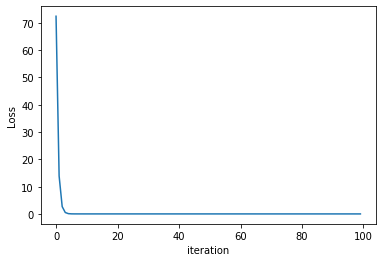

In [7]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()